# **TRAINING: 80%   TESTING: 20%**

In [ ]:
# Step1: Import the required libraries

import os
import pandas as pd
import numpy as np
import math
import datetime as dt


# Libraries required for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Libraries required to develop the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM,GRU


# Libraries required for plotting

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
#Phase 1 of the project
#Step2: Loading of required dataset
#bitcoin dataset timeperiod: Jan 01, 2017 - Apr 23, 2023 (nearly 6 years)
from google.colab import files


uploaded = files.upload()


Saving BTC-USD (8).csv to BTC-USD (8).csv


In [ ]:
#using pandas for reading csv files
#maindf will read the data from csv and will store it
import io
maindf = pd.read_csv(io.BytesIO(uploaded['BTC-USD (8).csv']))

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2304
Total number of fields present in the dataset:  7


In [ ]:
#Shape() will give the no. of rows and columns in the dataset
maindf.shape

(2304, 7)

In [ ]:
#head() gives the first 5 rows of the dataset
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2017,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008.0
1,02-01-2017,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992.0
2,03-01-2017,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000.0
3,04-01-2017,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984.0
4,05-01-2017,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008.0


In [ ]:
#tail() gives the last 5 rows of the dataset
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2299,19-04-2023,30394.18750,30411.05469,28669.89844,28822.67969,28822.67969,2.457157e+10
2300,20-04-2023,28823.68359,29076.40039,28037.25781,28245.98828,28245.98828,2.134036e+10
2301,21-04-2023,28249.23047,28349.96875,27177.36523,27276.91016,27276.91016,2.075950e+10
2302,22-04-2023,27265.89453,27872.14258,27169.57031,27817.50000,27817.50000,1.312573e+10
2303,23-04-2023,27816.14453,27820.24414,27400.31445,27591.38477,27591.38477,1.278545e+10


In [ ]:
#info() gives the information of the dataset
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2304 non-null   object 
 1   Open       2304 non-null   float64
 2   High       2304 non-null   float64
 3   Low        2304 non-null   float64
 4   Close      2304 non-null   float64
 5   Adj Close  2304 non-null   float64
 6   Volume     2304 non-null   float64
dtypes: float64(6), object(1)
memory usage: 126.1+ KB


In [ ]:
#Description of the dataset
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2.304000e+03
mean,17926.014266,18373.125358,17433.710289,17935.622665,17935.622665,2.261948e+10
std,16410.685642,16828.394403,15925.912059,16404.185561,16404.185561,1.988752e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,6509.902343,6616.156006,6428.169189,6516.062622,6516.062622,5.637379e+09
50%,10161.855470,10367.627930,9840.927735,10166.834475,10166.834475,2.012460e+10
75%,24583.979495,25149.273923,24210.972660,24647.155760,24647.155760,3.285223e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


**CHECKING FOR NULL VALUES**

In [ ]:
#Checking for NULL values
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


# **EDA (EXPLORATORY DATA ANALYSIS)**

In [ ]:
#Phase 2 of the project
#Exploratory data analysis

# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 01-01-2017
Ending Date 23-04-2023


Bitcoin Analysis from Start

# **ANALYSIS OF YEAR 2021**

In [ ]:
#Analysis of Bitcoin Price
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%d-%m-%Y') #converting date of the dataframe into datetime using pandas

#y_2021 will contain the data of year 2021
y_2021 = maindf.loc[(maindf['Date'] >= '01-01-2021')
                     & (maindf['Date'] < '01-01-2022')]

#Dropping the Adj Close and Volume columns from the dataset
y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1461,2021-01-01,28994.00977,29600.62695,28803.58594,29374.15234
1462,2021-01-02,29376.45508,33155.11719,29091.18164,32127.26758
1463,2021-01-03,32129.40820,34608.55859,32052.31641,32782.02344
1464,2021-01-04,32810.94922,33440.21875,28722.75586,31971.91406
1465,2021-01-05,31977.04102,34437.58984,30221.18750,33992.42969
...,...,...,...,...,...
1821,2021-12-27,50802.60938,51956.32813,50499.46875,50640.41797
1822,2021-12-28,50679.85938,50679.85938,47414.21094,47588.85547
1823,2021-12-29,47623.87109,48119.74219,46201.49609,46444.71094
1824,2021-12-30,46490.60547,47879.96484,46060.31250,47178.12500


In [ ]:
#To find Mean value of open and close price of each month of Year 2021
monthwise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Close
Date,,
January,34652.961695,34761.649952
February,45874.967217,46306.798967
March,54544.678177,54998.008695
April,57251.256250,57206.720053
May,47105.828503,46443.286669
June,35920.546941,35845.154688
July,34234.212451,34444.973792
August,45516.119835,45709.022682
September,46041.859376,45939.771485


In [ ]:
#Plotting the average of opening and closing price of bitcoin for each month
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Bitcoin Open Price',
    marker_color='orange'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Bitcoin Close Price',
    marker_color='crimson'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthwise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthwise_high = monthwise_high.reindex(new_order, axis=0)

monthwise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthwise_low = monthwise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0,153,204)'
))
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Bitcoin low Price',
    marker_color='purple'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin prices')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# **ANALYSIS OF YEAR 2022**

In [ ]:
#Analysis of Bitcoin Price
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d') #converting date of the dataframe into datetime using pandas

#y_2022 will contain the data of year 2022
y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2023-01-01')]

#Dropping the Adj Close and Volume columns from the dataset
y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1826,2022-01-01,46311.74609,47827.31250,46288.48438,47686.81250
1827,2022-01-02,47680.92578,47881.40625,46856.93750,47345.21875
1828,2022-01-03,47343.54297,47510.72656,45835.96484,46458.11719
1829,2022-01-04,46458.85156,47406.54688,45752.46484,45897.57422
1830,2022-01-05,45899.35938,46929.04688,42798.22266,43569.00391
...,...,...,...,...,...
2186,2022-12-27,16919.29102,16959.84570,16642.07227,16717.17383
2187,2022-12-28,16716.40039,16768.16992,16497.55664,16552.57227
2188,2022-12-29,16552.32227,16651.75586,16508.68359,16642.34180
2189,2022-12-30,16641.33008,16643.42773,16408.47461,16602.58594


In [ ]:
#To find Mean value of open and close price of each month of Year 2022
monthwise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Close
Date,,
January,41368.073463,41114.422380
February,40591.103934,40763.474053
March,41889.148438,41966.237526
April,41694.653646,41435.319662
May,31900.711128,31706.105218
June,24783.338477,24383.685483
July,21424.733053,21539.253843
August,22471.866558,22366.266318
September,19821.353711,19804.779231


In [ ]:
#Plotting the average of opening and closing price of bitcoin for each month
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Bitcoin Open Price',
    marker_color='orange'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Bitcoin Close Price',
    marker_color='crimson'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthwise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthwise_high = monthwise_high.reindex(new_order, axis=0)

monthwise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthwise_low = monthwise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0,153,204)'
))
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Bitcoin low Price',
    marker_color='purple'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin prices')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# **OVERALL ANALYSIS FROM 2021-2022**

In [ ]:
#Analysis of Bitcoin Price
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d') #converting date of the dataframe into datetime using pandas

#y_overall will contain the data of year 2022
y_overall = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2023-01-01')]

#Dropping the Adj Close and Volume columns from the dataset
y_overall.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1461,2021-01-01,28994.00977,29600.62695,28803.58594,29374.15234
1462,2021-01-02,29376.45508,33155.11719,29091.18164,32127.26758
1463,2021-01-03,32129.40820,34608.55859,32052.31641,32782.02344
1464,2021-01-04,32810.94922,33440.21875,28722.75586,31971.91406
1465,2021-01-05,31977.04102,34437.58984,30221.18750,33992.42969
...,...,...,...,...,...
2186,2022-12-27,16919.29102,16959.84570,16642.07227,16717.17383
2187,2022-12-28,16716.40039,16768.16992,16497.55664,16552.57227
2188,2022-12-29,16552.32227,16651.75586,16508.68359,16642.34180
2189,2022-12-30,16641.33008,16643.42773,16408.47461,16602.58594


In [ ]:
#To find Mean value of open and close price of each month of Year 2021 and 2022
monthwise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Close
Date,,
January,38010.517579,37938.036166
February,43233.035576,43535.136510
March,48216.913307,48482.123110
April,49472.954948,49321.019858
May,39503.269815,39074.695944
June,30351.942709,30114.420085
July,27829.472752,27992.113817
August,33993.993196,34037.644500
September,32931.606544,32872.275358


In [ ]:
#Plotting the average of opening and closing price of bitcoin for each month
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Bitcoin Open Price',
    marker_color='orange'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Bitcoin Close Price',
    marker_color='crimson'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [ ]:
y_overall.groupby(y_overall['Date'].dt.strftime('%B'))['Low'].min()
monthwise_high = y_overall.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthwise_high = monthwise_high.reindex(new_order, axis=0)

monthwise_low = y_overall.groupby(y_overall['Date'].dt.strftime('%B'))['Low'].min()
monthwise_low = monthwise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0,153,204)'
))
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Bitcoin low Price',
    marker_color='purple'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low Bitcoin prices')
fig.show()

In [ ]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin 2021-22 Analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# **BUILDING LSTM MODEL**

In [ ]:
#We only want to predict the closing price of data
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2304, 2)


In [ ]:
#Plotting only the close price of bitcoin from the year 2017 - 2023
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Bitcoin Close Price from 2017 to 2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Date'] < '2023-04-23']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  2303


In [ ]:
closedf

,Date,Close
0,2017-01-01,998.325012
1,2017-01-02,1021.750000
2,2017-01-03,1043.839966
3,2017-01-04,1154.729980
4,2017-01-05,1013.380005
...,...,...
2298,2023-04-18,30397.552730
2299,2023-04-19,28822.679690
2300,2023-04-20,28245.988280
2301,2023-04-21,27276.910160


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period(2017 - 2023) to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## **NORMALIZATION USING MIN MAX SCALER**

In [ ]:
#Since there is so much fluctuation in the data, Therefore we need to normalize the data

#Using MINMAXSCALER for Normalization

### Normalizing Data
#Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
#MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.


# deleting date column and normalizing using MinMax Scaler, because we only need Closing Price

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2303, 1)


In [ ]:
closedf

array([[0.00330246],
       [0.00365319],
       [0.00398393],
       ...,
       [0.41126835],
       [0.39675882],
       [0.40485281]])

## **SLICING DATA INTO TRAINING SET (80%) AND TESTING SET (20%)**

In [ ]:
### Slicing data into Training set and Testing set
# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1842, 1)
test_data:  (461, 1)


In [ ]:
### Now to Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1826, 15)
y_train:  (1826,)
X_test:  (445, 15)
y_test (445,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1826, 15, 1)
X_test:  (445, 15, 1)


**ACTUAL MODEL BUILDING (LSTM)**

In [ ]:

# Actuall Model Building
model=Sequential()

#Adding layers:
#First layer is LSTM and the next one is dense layer
model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
#history variable is created for storing the history of the model
#it tells us the loss and validation loss
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
58/58 [==============================] - 4s 19ms/step - loss: 0.1044 - val_loss: 0.0830
Epoch 2/200
58/58 [==============================] - 1s 9ms/step - loss: 0.0275 - val_loss: 0.0024
Epoch 3/200
58/58 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4/200
58/58 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/200
58/58 [==============================] - 1s 9ms/step - loss: 6.5723e-04 - val_loss: 5.2885e-04
Epoch 6/200
58/58 [==============================] - 1s 9ms/step - loss: 4.8749e-04 - val_loss: 4.5290e-04
Epoch 7/200
58/58 [==============================] - 1s 9ms/step - loss: 4.4945e-04 - val_loss: 5.1135e-04
Epoch 8/200
58/58 [==============================] - 1s 10ms/step - loss: 4.5880e-04 - val_loss: 4.7437e-04
Epoch 9/200
58/58 [==============================] - 1s 9ms/step - loss: 4.2136e-04 - val_loss: 5.3095e-04
Epoch 10/200
58/58 [==============================] - 1s 9ms/step 

**PLOTTING LOSS VS VALIDATION LOSS**

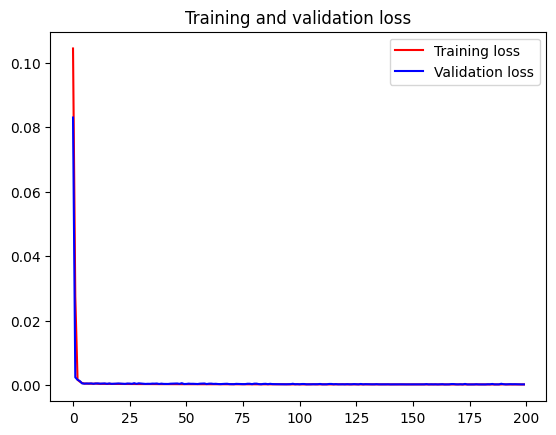

<Figure size 640x480 with 0 Axes>

In [ ]:
### Plotting Loss vs Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
#Prediction and checking of performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

14/14 [==============================] - 0s 3ms/step


((1826, 1), (445, 1))

# **MODEL EVALUATION**

In [ ]:
# Model Evaluation
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### **EVALUATION METRICES RMSE,MSE and MAE**

In [ ]:
## Evaluation metrices RMSE, MSE and MAE for LSTM
# Evaluation metrices RMSE and MAE for LSTM
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  933.2404195710978
Train data MSE:  870937.6807212388
Train data MAE:  490.1220651052912
-------------------------------------------------------------------------------------
Test data RMSE:  1007.2266718525005
Test data MSE:  1014505.5684910648
Test data MAE:  675.4471730280897


In [ ]:
mape = np.round(np.mean(np.abs((np.array(test_predict) - np.array(original_ytest)) / np.abs(original_ytest)) * 100), 4)
print('Result Mean Absolute Percentage Error Prediction Model : '+str(mape)+'%') #Mean Absolute Percentage Error

Result Mean Absolute Percentage Error Prediction Model : 2.5324%


**Variance Regression Score**

In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9970301685439859
Test data explained variance regression score: 0.9877192657128897


**R Square Score for Regression**

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9970298660948627
Test data R2 score: 0.9867537476221162


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0024134131156271854
Test data MGD:  0.0012657165072965013
----------------------------------------------------------------------
Train data MPD:  29.59816764107189
Test data MPD:  34.26533265315287


## **Comparision of original Bitcoin close price and predicted close price**

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Bitcoin price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price of Bitcoin',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2303, 1)
Test predicted data:  (2303, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array          #created array for timestamp

lst_output=[]
n_steps=time_step
i=0
pred_days = 15
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  15


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 15 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Bitcoin price','index': 'Timestamp'})
fig.update_layout(title_text='Comparision of last 15 days vs next 30 days',
                  plot_bgcolor='black', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Plotting entire Closing Bitcoin Price with next 30 days period of prediction**

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Bitcoin price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole Closing Bitcoin price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
len(test_predict)

445

In [ ]:
len(original_ytest)

445

MEAN ABSOLUTE ERROR IS 37.6034%